
<a id='chap-tpforetsaleatoires'></a>

# Travaux pratiques - Forêts aléatoires

L’objectif de cette séance de travaux pratiques est de montrer l’utilisation des méthodes d’agrégation (*bagging*, forêts aléatoires, *boosting*) pour les problèmes de classification et de régression, en python avec Sciki-learn. Ce document reprend librement certains exemples présentés dans la documentation de Scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  

## Méthodes d’agrégation

Les méthodes ensemblistes (ou d’agrégation) pour les algorithmes d’apprentissage statistique (en anglais : *ensemble learning*) sont basées sur l’idée de combiner les prédictions de plusieurs prédicteurs (ou classifieurs) pour une meilleure généralisation et pour compenser les défauts éventuels de prédicteurs
individuels.

En général, on distingue deux familles de méthodes de ce type :

1. Méthodes par moyennage (*bagging*, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions en espérant un meilleur résultat suite à la réduction de variance de l’éstimateur moyenne.  
1. Méthodes adaptatives (*boosting*) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.  


Dans la suite nous explorerons chacune de ces classes d’algorithme en Scikit-learn et présenterons quelques comparaisons.

## *Bagging*

Les méthodes de type *bagging* construisent plusieurs instances d’un estimateur, calculées sur des échantillons aléatoires tirés de la base d’apprentissage (et éventuellement une partie des attributs, également sélectionnés de façon aléatoire), et ensuite combine les prédictions individuelles en réalisant leur moyenne pour réduire la variance de l’estimateur. Leur avantage principal réside dans le fait qu’ils construisent une version améliorée de l’algorithme de base, sans demander de modification de cet algorithme. Le prix à payer est un coût de calcul plus élevé. Comme elles réduisent le sur-apprentissage, les méthodes *bagging* fonctionnent très bien avec des prédicteurs « forts ». Par contraste, les méthodes *boosting* sont mieux adaptées à des prédicteurs faibles (*weak learners*).

Dans Scikit-learn, les méthodes de *bagging* sont implémentées via la classe `BaggingClassifier` et `BaggingRegressor`. Les constructeurs prennent en paramètres un estimateur de base et la stratégie de sélection des points et attributs :

> - `base_estimator` : optionnel (default=None). Si None alors l’estimateur est un arbre de décision.  
- `max_samples` : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.  
- `max_features` : le nombre d’attributs tirés aléatoirement.  
- `bootstrap` : boolean, optionnel (default=True). Tirage des points avec remise ou non.  
- `bootstrap_features` : boolean, optionnel (default=False). Tirage des attributs avec remise ou non.  
- `oob_score` : boolean. Estimer ou non l’erreur de généralisation OOB (*Out of Bag*).  



Le code suivant construit un ensemble des classifieurs. Chaque classifieur de base est un `KNeighborsClassifier` (c’est-à-dire k-plus-proches-voisins), chacun utilisant au maximum 50% des points pour son apprentissage et la moitié des attributs (*features*) :

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

Dans cet exemple nous allons utiliser la base de données `digits`, qui contient 10 classes (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).

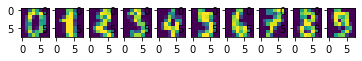

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

Pour ce TP, nous allons utiliser comme classifieur de base un arbre de décision `DecisionTreeClassifier`. Ce classifieur nous permet d’établir des performances de référence (c’est un ensemble à 1 modèle).

In [3]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


Sur la base d’apprentissage `accuracy = 1` . Pour plus de réalisme, découpons la base de données en un jeu d’apprentissage et un je de test afin de voir le comportement de généralisation de l’arbre sur des données différentes des celles d’apprentissage :

In [4]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6878862793572311


## Question :

Construire la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

In [ ]:
acc_tot = []
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train, y_train)

  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))

print(acc_tot)
variance = np.var(acc_tot)
print("variance = ", variance)
print("moyenne = ", np.mean(acc_tot))
print(np.sum((acc_tot - np.mean(acc_tot))**2)/100)

[0.6817058096415327, 0.6817058096415327, 0.607540173053152, 0.6452410383189122, 0.6773794808405439, 0.681087762669963, 0.7064276885043264, 0.6236093943139679, 0.7051915945611866, 0.6372064276885043, 0.7243510506798516, 0.6644004944375772, 0.6847960444993819, 0.6953028430160693, 0.703955500618047, 0.7583436341161929, 0.7082818294190358, 0.69221260815822, 0.6470951792336218, 0.6742892459826947, 0.7126081582200248, 0.6934487021013597, 0.6854140914709518, 0.7082818294190358, 0.7354758961681088, 0.6674907292954264, 0.6909765142150803, 0.6501854140914709, 0.7181705809641533, 0.6063040791100124, 0.7021013597033374, 0.6835599505562423, 0.6699629171817059, 0.7132262051915945, 0.6934487021013597, 0.715698393077874, 0.6786155747836835, 0.6829419035846724, 0.6508034610630408, 0.6637824474660075, 0.7132262051915945, 0.7132262051915945, 0.6798516687268232, 0.7237330037082819, 0.7126081582200248, 0.6569839307787392, 0.6909765142150803, 0.676761433868974, 0.700247218788628, 0.6619283065512979, 0.73362

Pour comparer, construisons maintenant un classifieur *bagging* sur nos données, toujours basé sur les `DecisionTreeClassifier` :

In [ ]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

L’apprentissage et l’évaluation de cet ensemble se font de la façon habituelle :

In [6]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print("accuracy = ", accuracy)

accuracy =  0.9060568603213844


Text(0.5, 1.0, 'accuracy')

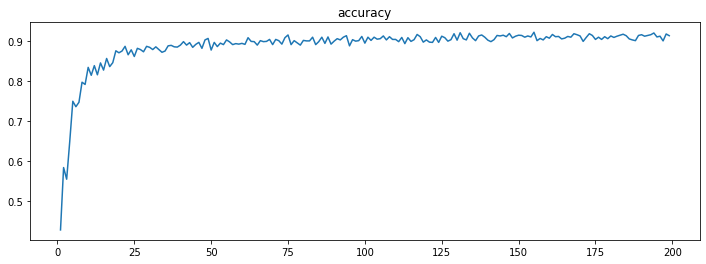

In [5]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
acc_tot = []
nb_est = []
for i in range(1,200):
  clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i)
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))
  nb_est.append(i)
fig = plt.figure(figsize=(12, 4))
plt.plot(nb_est, acc_tot)
plt.title("accuracy")

## Question :

Calculer la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

In [ ]:
acc_tot = []
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
  clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
  clf.fit(X_train, y_train)

  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))

print(acc_tot)
variance = np.var(acc_tot)
print("variance = ", variance)
print("moyenne = ", np.mean(acc_tot))
print(np.sum((acc_tot - np.mean(acc_tot))**2)/100)

[0.899876390605686, 0.9011124845488258, 0.9048207663782447, 0.8646477132262052, 0.9147095179233622, 0.8881334981458591, 0.9004944375772559, 0.9245982694684796, 0.8912237330037083, 0.9103831891223733, 0.8906056860321384, 0.9011124845488258, 0.8498145859085291, 0.8868974042027195, 0.9289245982694685, 0.9171817058096415, 0.8813349814585909, 0.9060568603213844, 0.892459826946848, 0.9103831891223733, 0.8788627935723115, 0.8906056860321384, 0.9134734239802225, 0.9017305315203955, 0.9017305315203955, 0.9134734239802225, 0.8918417799752781, 0.9011124845488258, 0.8868974042027195, 0.8943139678615575, 0.9048207663782447, 0.8881334981458591, 0.9103831891223733, 0.9128553770086527, 0.8838071693448702, 0.853522867737948, 0.8776266996291718, 0.8980222496909765, 0.896168108776267, 0.9103831891223733, 0.8102595797280593, 0.907292954264524, 0.8862793572311496, 0.8856613102595797, 0.8850432632880099, 0.8813349814585909, 0.9048207663782447, 0.8899876390605687, 0.8992583436341162, 0.8943139678615575, 0.90

## Question :

Faites varier les parametres `max_samples` et `max_features`. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser `GridSearchCV` pour réaliser une recherche systématique.

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=200)
parameters = {'max_samples':np.arange(0.1, 0.8, 0.1), 'max_features':np.arange(0.1, 0.8, 0.1)}
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

Best estimator found by grid search:
BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                      

## Forêts aléatoires

L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le *bagging*, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu. Les deux objets Python qui implémentent les forêts aléatoires sont `RandomForestClassifier` et `RandomForestRegressor`. Les paramètres les plus importants sont :

> - `n_estimators` : integer, optional (default=10). Le nombre d’arbres.  
- `max_features` : le nombre d’attributs à considérer à chaque split.  
- `max_samples` : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.  
- `min_samples_leaf` : le nombre minimal d’éléments dans un nœud feuille.  
- `oob_score` : boolean. Estimer ou non l’erreur de généralisation OOB (*Out of Bag*).  



Par la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier`. Comme d’habitude, on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test.

In [10]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

On peut désormais créer et entraîner notre modèle :

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Puis réaliser les prédictions et calculer le score de test :

In [12]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9202719406674907


## Question :

Comment la valeur de la variable `accuracy` se compare avec le cas *bagging* qui utilise le même nombre d’arbres (200 dans notre cas) ?

## Question :

Construire la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (*bagging*) ?

In [ ]:
acc_tot = []
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
  clf = RandomForestClassifier(n_estimators=200)
  clf.fit(X_train, y_train)

  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))

print(acc_tot)
variance = np.var(acc_tot)
print("variance = ", variance)
print("moyenne = ", np.mean(acc_tot))

[0.9165636588380717, 0.9258343634116193, 0.9320148331273177, 0.9208899876390606, 0.8893695920889988, 0.9165636588380717, 0.919035846724351, 0.9245982694684796, 0.9110012360939431, 0.9196538936959209, 0.9283065512978986, 0.927070457354759, 0.9245982694684796, 0.9085290482076638, 0.9060568603213844, 0.9196538936959209, 0.92336217552534, 0.907292954264524, 0.9128553770086527, 0.9011124845488258, 0.92336217552534, 0.899876390605686, 0.9245982694684796, 0.9159456118665018, 0.9239802224969098, 0.9258343634116193, 0.9054388133498146, 0.9054388133498146, 0.9091470951792336, 0.904202719406675, 0.92336217552534, 0.9134734239802225, 0.8980222496909765, 0.9227441285537701, 0.9215080346106304, 0.8788627935723115, 0.907292954264524, 0.8831891223733004, 0.9029666254635352, 0.8980222496909765, 0.9283065512978986, 0.9110012360939431, 0.9097651421508035, 0.9258343634116193, 0.9035846724351051, 0.9258343634116193, 0.9004944375772559, 0.899876390605686, 0.9320148331273177, 0.9085290482076638, 0.9091470951

## Question :

Construire le graphique `accuracy` vs `n_estimators`. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

Text(0.5, 1.0, 'accuracy')

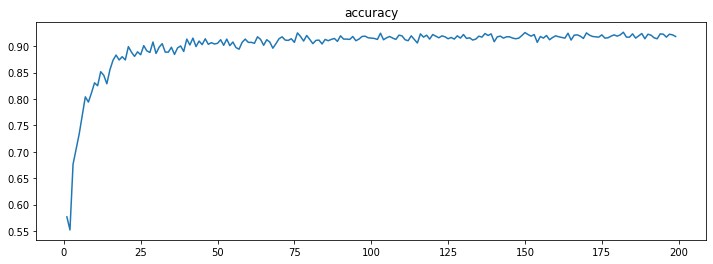

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
acc_tot = []
nb_est = []
for i in range(1,200):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))
  nb_est.append(i)
fig = plt.figure(figsize=(12, 4))
plt.plot(nb_est, acc_tot)
plt.title("accuracy")

## Question :

Regardez dans la documentation les *ExtraTreesClassifier* et refaites la classification avec ce type de classifieur. Comparez avec *RandomForestClassifier*.

Text(0.5, 1.0, 'accuracy')

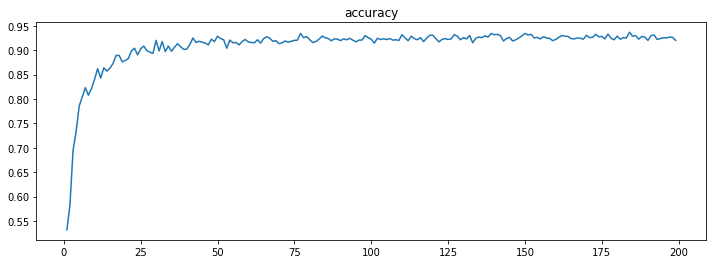

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
acc_tot = []
nb_est = []
for i in range(1,200):
  clf = ExtraTreesClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))
  nb_est.append(i)
fig = plt.figure(figsize=(12, 4))
plt.plot(nb_est, acc_tot)
plt.title("accuracy")

## *Boosting*

Le principe du *boosting* est d’évaluer une séquence de classifieurs faibles (*weak learners*) sur plusieurs versions légèrement modifiées des données d’apprentissage. Les décisions obtenues sont alors combinées par une somme ponderée pour obtenir le modèle final.

Avec scikit-learn, c’est la classe `AdaBoostClassifier` qui implémente cet algorithme. Les paramètres les plus importants sont :

> - `n_estimators` : integer, optional (default=10). Le nombre de classifieurs faibles.  
- `learning_rate` : contrôle la vitesse de changement des poids par itération.  
- `base_estimator` : (default=DecisionTreeClassifier) le classifieur faible utilisé.  



Dans la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier` :

In [13]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.92336217552534


## Question :

Le paramètre `max_depth` contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (`max_depth` élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre `learning_rate` et le nombre de classifieurs.

In [ ]:
# AdaBoost basé sur 200 arbres de décision + varier max_depth
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (depth=3) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (depth=5) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=7), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (depth=7) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=9), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (depth=9) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=11), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (depth=11) =", accuracy)

# AdaBoost basé sur 200 arbres de décision + varier learning_rate
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.25)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (rate=0.25) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.5)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (rate=0.5) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (rate=1) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (rate=2) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=4)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (rate=4) =", accuracy)

clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=8)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("accuracy (rate=8) =", accuracy)

accuracy (depth=3) = 0.8541409147095179
accuracy (depth=5) = 0.8831891223733004
accuracy (depth=7) = 0.8955500618046972
accuracy (depth=11) = 0.6619283065512979
accuracy (depth=11) = 0.6637824474660075
accuracy (rate=0.25) = 0.8862793572311496
accuracy (rate=0.5) = 0.904202719406675
accuracy (rate=1) = 0.8992583436341162
accuracy (rate=2) = 0.8887515451174289
accuracy (rate=4) = 0.842398022249691
accuracy (rate=8) = 0.6996291718170581


In [ ]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=200)
parameters = {'max_depth':np.arange(3, 9, 1), 'learning_rate':np.arange(0.1, 3, 0.2)}
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

Text(0.5, 1.0, 'accuracy')

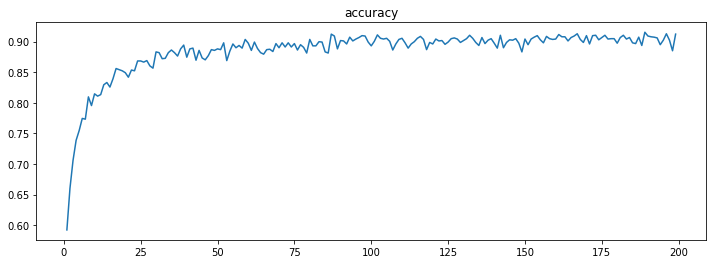

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
acc_tot = []
nb_est = []
for i in range(1,200):
  clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=i, learning_rate=0.5)
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  acc_tot.append(clf.score(X_test,y_test))
  nb_est.append(i)
fig = plt.figure(figsize=(12, 4))
plt.plot(nb_est, acc_tot)
plt.title("accuracy")